### Name: Jiten Sidhpura 
### UID: 2018130051
### Batch B
### BE COMPS

### Objective: To implement and use Principal Component Analysis using Python Platform

## Import Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Load Abalone Dataset into Pandas DataFrame

In [49]:
dataset = pd.read_csv('abalone.data')
dataset.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


## Add header into the Dataset

In [50]:
dataset.columns = ['Sex', 'Length', 'Diameter', 'Height',
                   'Whole weight', 'Shucked weight',
                    'Viscera weight', 'Shell weight', 'Rings'
                ]

In [51]:
dataset.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


## Delete Duplicate Rows if Present

In [52]:
dataset = dataset.drop_duplicates()

## Check for Missing Values

<AxesSubplot:>

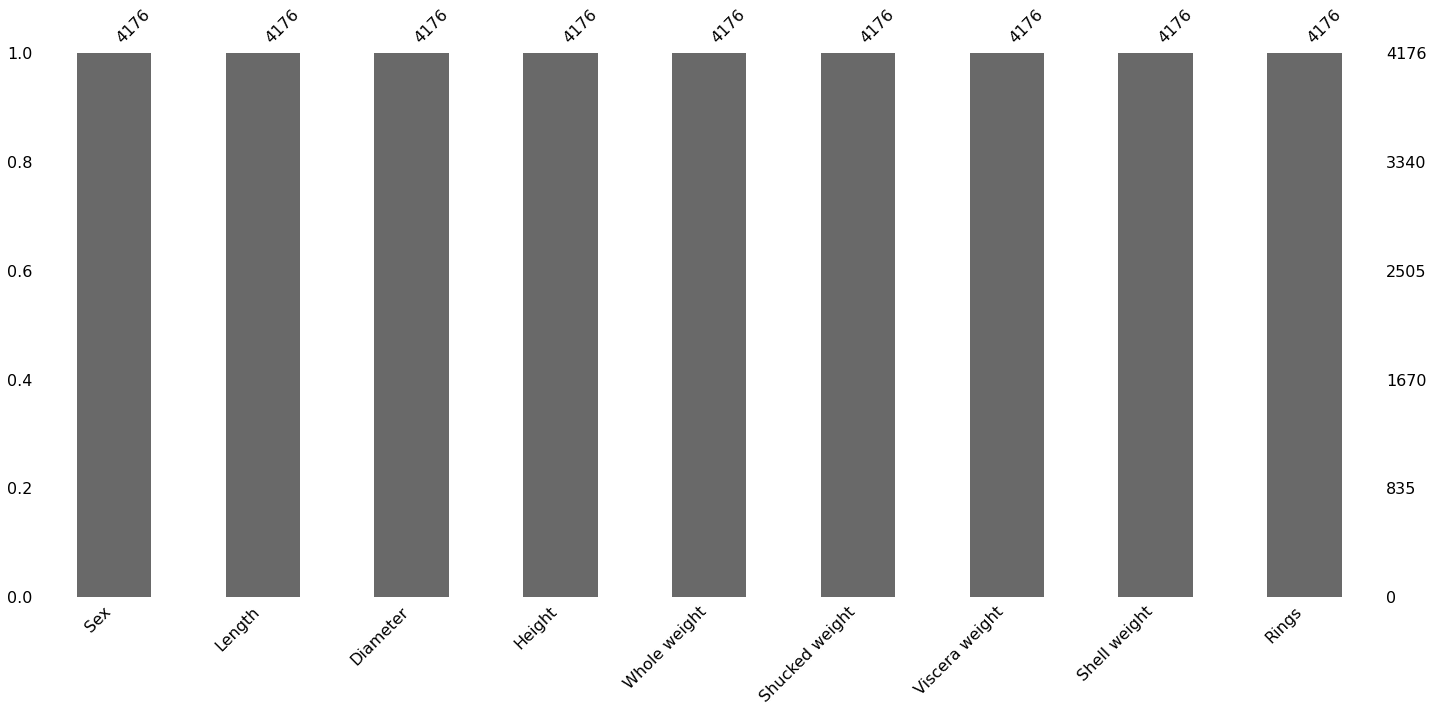

In [53]:
import missingno
missingno.bar(dataset)

## Summary of Research Paper on PCA


1.   PCA Rank gives actual number of independent features.
2.   Classical PCA deals with normed variables (data that is centered and reduced)



In [54]:
dataset.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


## Rings Feature

### Values are continuous integers so we can treat this problem as Regression

In [55]:
dataset['Rings'].unique()

array([ 7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 15, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [56]:
dataset['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    102
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

## Sex Attribute

In [57]:
dataset['Sex'].value_counts()

M    1527
I    1342
F    1307
Name: Sex, dtype: int64

### There are three types Male, Female and Infant
### Lets encode them as 
### M ==> 0
### I ==> 1
### F ==> 2

In [58]:
sex_to_numeric_dict = {
    'M': 0,
    'I': 1,
    'F': 2
}

dataset['Sex_Transformed'] = dataset['Sex'].map(sex_to_numeric_dict)

dataset.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_Transformed
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,2
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,1


## Skewness of All Numerical Vars

In [59]:
dataset.skew()

C:\Users\jiten\AppData\Local\Temp/ipykernel_708/4231230252.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.skew()


Length            -0.640240
Diameter          -0.609457
Height             3.129241
Whole weight       0.530576
Shucked weight     0.718724
Viscera weight     0.591463
Shell weight       0.620547
Rings              1.115157
Sex_Transformed    0.097729
dtype: float64

### Significant amount of data is skewed so to reduce it we can normalize these variables

In [60]:
numerical_cols = [
    'Length', 'Diameter', 'Height',
    'Whole weight', 'Shucked weight',
    'Viscera weight', 'Shell weight',
]


In [61]:
normalized_dataset = dataset.copy()

## Normalizing Dataset using sklearn's Normalizer

In [62]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

normalized_dataset[numerical_cols] = normalizer.fit_transform(normalized_dataset[numerical_cols])

In [63]:
normalized_dataset.skew()

C:\Users\jiten\AppData\Local\Temp/ipykernel_708/1718646135.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  normalized_dataset.skew()


Length             0.458115
Diameter           0.331206
Height             2.295045
Whole weight      -1.344990
Shucked weight    -0.608027
Viscera weight    -0.632647
Shell weight      -0.323576
Rings              1.115157
Sex_Transformed    0.097729
dtype: float64

## Length Feature

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length', ylabel='Density'>

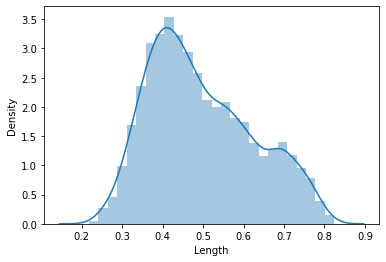

In [64]:
sns.distplot(normalized_dataset['Length'])

## Diameter Feature

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Diameter', ylabel='Density'>

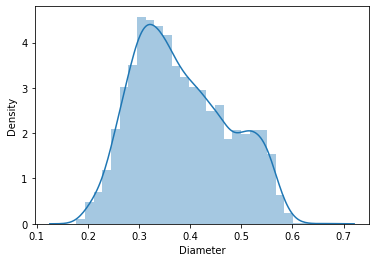

In [65]:
sns.distplot(normalized_dataset['Diameter'])

## Height Feature

## After normalization this feature is still skewed

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

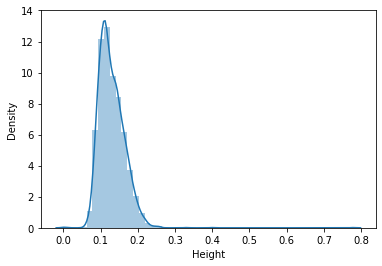

In [66]:
sns.distplot(normalized_dataset['Height'])

## Applying Boxcox Transformation to reduce skewness in the Height Feature

In [67]:
from scipy.special import boxcox, inv_boxcox

def apply_boxcox_transformation(dataset_feature, x):
    print(f'Before ==> {dataset_feature.skew()}')
    
    sns.distplot(dataset_feature)
    plt.show()

    tranformed_dataset_feature = boxcox(dataset_feature, x)

    print(f'After ==> {tranformed_dataset_feature.skew()}')

    sns.distplot(tranformed_dataset_feature)
    plt.show()

Before ==> 2.295044653196873


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


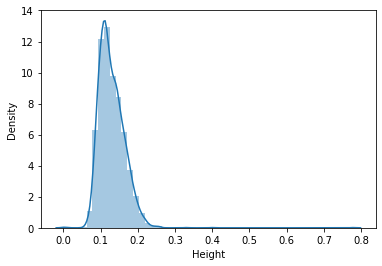

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


After ==> 0.10575339899587774


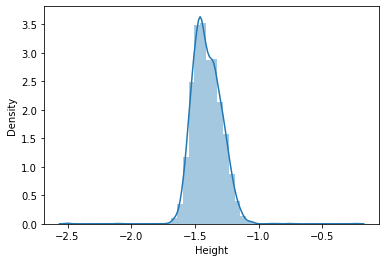

In [68]:
apply_boxcox_transformation(normalized_dataset['Height'], 0.4)

In [69]:
normalized_dataset['Height'] = boxcox(normalized_dataset['Height'], 0.4)

## Get Dataset for Models without PCA 

In [70]:
dataset.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'Sex_Transformed'],
      dtype='object')

In [71]:
features_for_without_PCA_model = [
    'Length', 'Diameter', 'Height',
    'Whole weight', 'Shucked weight', 'Viscera weight',
    'Shell weight', 'Sex_Transformed', 'Rings'
]

modelling_dataset_without_pca = normalized_dataset[features_for_without_PCA_model]

modelling_dataset_without_pca.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_Transformed,Rings
0,0.675042,0.511103,-1.259085,0.434920,0.191905,0.093542,0.135008,0,7
1,0.513869,0.407217,-1.391581,0.656395,0.248693,0.137193,0.203608,2,9
2,0.528868,0.438720,-1.328717,0.620218,0.259025,0.137025,0.186306,0,10
3,0.680817,0.526086,-1.283863,0.422932,0.184646,0.081492,0.113469,1,7
4,0.638186,0.450484,-1.352764,0.527817,0.211728,0.116375,0.180194,1,8


## Correlation Matrix

In [72]:
modelling_dataset_without_pca.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_Transformed,Rings
Length,1.000000,0.983396,0.824938,-0.957107,-0.856686,-0.820205,-0.751495,-0.023530,-0.579459
Diameter,0.983396,1.000000,0.830269,-0.938888,-0.851128,-0.808733,-0.718139,-0.019625,-0.555678
Height,0.824938,0.830269,1.000000,-0.779709,-0.754910,-0.659325,-0.571959,-0.009542,-0.399006
Whole weight,-0.957107,-0.938888,-0.779709,1.000000,0.856499,0.857364,0.804319,0.031319,0.596646
Shucked weight,-0.856686,-0.851128,-0.754910,0.856499,1.000000,0.701145,0.527114,-0.004048,0.314927
Viscera weight,-0.820205,-0.808733,-0.659325,0.857364,0.701145,1.000000,0.641723,0.047791,0.480590
Shell weight,-0.751495,-0.718139,-0.571959,0.804319,0.527114,0.641723,1.000000,0.044616,0.684101
Sex_Transformed,-0.023530,-0.019625,-0.009542,0.031319,-0.004048,0.047791,0.044616,1.000000,0.035076
Rings,-0.579459,-0.555678,-0.399006,0.596646,0.314927,0.480590,0.684101,0.035076,1.000000


<AxesSubplot:>

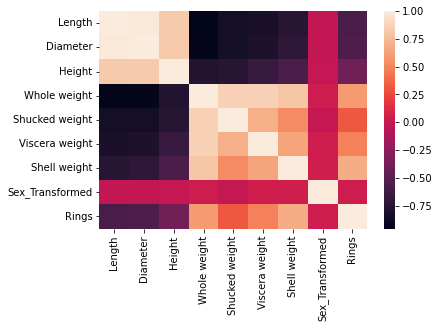

In [73]:
sns.heatmap(modelling_dataset_without_pca.corr())

## Train Test Split Dataset

In [74]:
from sklearn.model_selection import train_test_split

modelling_X_train, modelling_X_test, modelling_y_train, modelling_y_test = train_test_split(modelling_dataset_without_pca.drop('Rings', axis=1), 
                                                    modelling_dataset_without_pca['Rings'], test_size=0.2, random_state=42)

## Applying Linear Regression on modelling_dataset_without_pca dataset

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
reg_without_pca = LinearRegression().fit(modelling_X_train, modelling_y_train)

In [77]:
from sklearn.metrics import mean_squared_error

mse_without_pca = mean_squared_error(reg_without_pca.predict(modelling_X_test), modelling_y_test)

mse_without_pca

4.501579952986513

## Regression Coefficients without PCA 

In [78]:
reg_without_pca.coef_

array([-12.71443678,  -0.65260545,   3.10426611,  12.042512  ,
       -25.21786555, -11.21101898,  18.55342048,  -0.02702852])

## Applying PCA to Dataset


In [79]:
PCA_features = [
    'Length', 'Diameter', 'Height',
    'Whole weight', 'Shucked weight', 'Viscera weight',
    'Shell weight'
]

non_PCA_features = [column for column in modelling_dataset_without_pca.columns if column not in PCA_features]

pca_dataset = modelling_dataset_without_pca.copy()

pca_dataset.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_Transformed,Rings
0,0.675042,0.511103,-1.259085,0.434920,0.191905,0.093542,0.135008,0,7
1,0.513869,0.407217,-1.391581,0.656395,0.248693,0.137193,0.203608,2,9
2,0.528868,0.438720,-1.328717,0.620218,0.259025,0.137025,0.186306,0,10
3,0.680817,0.526086,-1.283863,0.422932,0.184646,0.081492,0.113469,1,7
4,0.638186,0.450484,-1.352764,0.527817,0.211728,0.116375,0.180194,1,8


## Performing Feature Selection using PCA 

In [80]:
from sklearn.decomposition import PCA

number_of_components = 6

pca = PCA(n_components=number_of_components)

pca_modified_dataset = pca.fit_transform(pca_dataset[PCA_features])

## Creating DataFrame of PCA Values

In [81]:
pca_columns = [f'PCA_{i}' for i in range(1, number_of_components + 1)] 
pca_modelling_dataset = pd.DataFrame(pca_modified_dataset, columns=pca_columns)

pca_modelling_dataset.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6
0,0.348633,-0.010547,-0.009722,-0.009438,0.002985,0.000682
1,0.015591,-0.022212,0.031052,-0.027271,-0.002737,-0.010109
2,0.080286,-0.055954,-0.002687,-0.022802,-0.001240,0.000472
3,0.361054,0.022659,-0.011328,-0.012212,-0.002775,-0.015295
4,0.201564,0.016547,0.027548,-0.035239,0.001706,0.004153


## Creating Dataframe for Modelling

In [82]:
pca_modelling_dataset[non_PCA_features] = modelling_dataset_without_pca[non_PCA_features]

pca_modelling_dataset.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,Sex_Transformed,Rings
0,0.348633,-0.010547,-0.009722,-0.009438,0.002985,0.000682,0,7
1,0.015591,-0.022212,0.031052,-0.027271,-0.002737,-0.010109,2,9
2,0.080286,-0.055954,-0.002687,-0.022802,-0.001240,0.000472,0,10
3,0.361054,0.022659,-0.011328,-0.012212,-0.002775,-0.015295,1,7
4,0.201564,0.016547,0.027548,-0.035239,0.001706,0.004153,1,8


## Correlation Matrix

In [83]:
pca_modelling_dataset.corr()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,Sex_Transformed,Rings
PCA_1,1.000000e+00,1.261966e-16,1.153724e-17,-4.672648e-17,-1.540530e-18,-6.895360e-17,-0.023534,-0.563074
PCA_2,1.261966e-16,1.000000e+00,9.582873e-17,1.235188e-16,1.002008e-16,3.317037e-17,-0.032818,-0.246015
PCA_3,1.153724e-17,9.582873e-17,1.000000e+00,-4.664165e-17,-2.902042e-16,-1.849964e-16,0.052478,0.399485
PCA_4,-4.672648e-17,1.235188e-16,-4.664165e-17,1.000000e+00,3.799964e-17,6.521303e-17,-0.008832,0.072989
PCA_5,-1.540530e-18,1.002008e-16,-2.902042e-16,3.799964e-17,1.000000e+00,-1.254347e-16,-0.034934,0.070745
PCA_6,-6.895360e-17,3.317037e-17,-1.849964e-16,6.521303e-17,-1.254347e-16,1.000000e+00,0.016181,-0.061763
Sex_Transformed,-2.353434e-02,-3.281797e-02,5.247754e-02,-8.832398e-03,-3.493362e-02,1.618102e-02,1.000000,0.035076
Rings,-5.630739e-01,-2.460153e-01,3.994854e-01,7.298889e-02,7.074495e-02,-6.176325e-02,0.035076,1.000000


<AxesSubplot:>

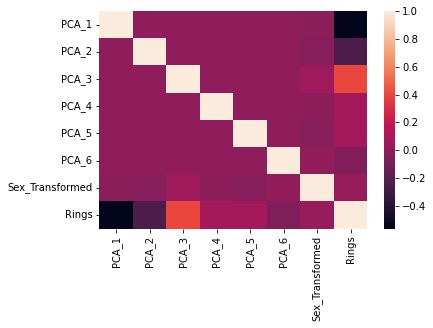

In [84]:
sns.heatmap(pca_modelling_dataset.corr())

## Train Test Split

In [85]:
from sklearn.model_selection import train_test_split

pca_modelling_dataset_X_train, pca_modelling_dataset_X_test, pca_modelling_dataset_y_train, pca_modelling_dataset_y_test = train_test_split(pca_modelling_dataset.drop('Rings', axis=1), 
                                                    pca_modelling_dataset['Rings'], test_size=0.2, random_state=42)



## Linear Regression after PCA 

In [86]:
reg_with_pca = LinearRegression().fit(pca_modelling_dataset_X_train, pca_modelling_dataset_y_train)

In [87]:
from sklearn.metrics import mean_squared_error

mse_after_pca = mean_squared_error(reg_with_pca.predict(pca_modelling_dataset_X_test), pca_modelling_dataset_y_test)

mse_after_pca

4.505471008250627

## Let's Try PCA with different number of components

In [88]:
def apply_PCA(modelling_dataset_without_pca, lower = 3, upper=None):

    pca_errors_list = []

    for component_value in range(lower, 1 + upper):
        
        pca = PCA(n_components=component_value)

        pca_transformed_data = pca.fit_transform(modelling_dataset_without_pca[PCA_features])

        pca_columns = [f'PCA_{i}' for i in range(1, component_value + 1)] 
        
        pca_modelling_dataset = pd.DataFrame(pca_transformed_data, columns=pca_columns)

        pca_modelling_dataset[non_PCA_features] = modelling_dataset_without_pca[non_PCA_features]

        pca_modelling_dataset_X_train, pca_modelling_dataset_X_test, pca_modelling_dataset_y_train, pca_modelling_dataset_y_test = train_test_split(pca_modelling_dataset.drop('Rings', axis=1), 
                                                            pca_modelling_dataset['Rings'], test_size=0.2, random_state=42)      

        reg_with_pca = LinearRegression().fit(pca_modelling_dataset_X_train, pca_modelling_dataset_y_train)

        mse_after_pca = mean_squared_error(reg_with_pca.predict(pca_modelling_dataset_X_test), pca_modelling_dataset_y_test)

        print(f'MSE on TEST SET with {component_value} in PCA ==> {mse_after_pca}')

        pca_errors_list.append((component_value, mse_after_pca))

    return pca_errors_list

In [89]:
pca_errors_list = apply_PCA(modelling_dataset_without_pca, lower=3, upper=6)

MSE on TEST SET with 3 in PCA ==> 4.695495055848563
MSE on TEST SET with 4 in PCA ==> 4.642977663521206
MSE on TEST SET with 5 in PCA ==> 4.56747898725485
MSE on TEST SET with 6 in PCA ==> 4.505471008250627


In [90]:
pca_results_df = pd.DataFrame(pca_errors_list, columns=['PCA_components', 'MSE'])
pca_results_df.head()

,PCA_components,MSE
0,3,4.695495
1,4,4.642978
2,5,4.567479
3,6,4.505471


## Plot of MSE values for different PCA Components

<AxesSubplot:title={'center':'Barplot of mean square error and PCA_components Value'}, xlabel='PCA_components', ylabel='MSE'>

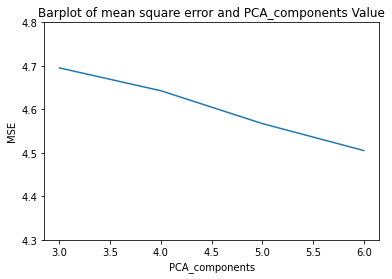

In [91]:
plt.title('Barplot of mean square error and PCA_components Value')
plt.ylim([4.3, 4.8])
sns.lineplot(x='PCA_components', y='MSE', data=pca_results_df)

### MSE reduces when PCA components value increases

## Comparing Without PCA and Best PCA 

<AxesSubplot:title={'center':'Comparison of MSE of Without PCA and Best PCA'}>

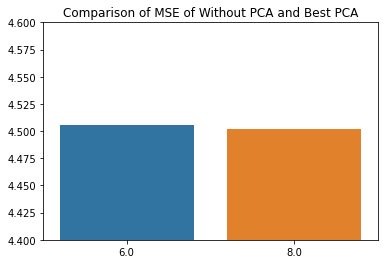

In [92]:
plt.title('Comparison of MSE of Without PCA and Best PCA')

row_index_of_best_pca = pca_results_df[['MSE']].idxmin()

number_of_components_in_without_pca = len(modelling_dataset_without_pca.columns) - 1

number_of_components_of_best_pca = pca_results_df.iloc[3]['PCA_components']

best_pca_error = pca_results_df.iloc[3]['MSE']

plt.ylim([4.4, 4.6])
sns.barplot(x=[number_of_components_in_without_pca, number_of_components_of_best_pca], y=[mse_without_pca, best_pca_error])

## Conclusion

1. Successfully Understood PCA after going thorugh the research paper and why data needs to be reduced and centered before applying PCA.
2. Implemented PCA using Sklearn Python module on Abalone Dataset (Regression Problem).
3. Mean Square Error after PCA (n_components = 6) is almost same as when all features are considered
4. Thus with the help of PCA without compromising much model performance we dropped some features and it made our model simpler and faster

### References



1.   [Sklearn PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
2.   [PCA Research Paper](https://e.edim.co/30264616/qlFg8ZRxu6A2aTLL.pdf?response-content-disposition=filename%3D%22Principal_Component_Analysis_PCA.pdf%22%3B%20filename%2A%3DUTF-8%27%27Principal_Component_Analysis_PCA.pdf&Expires=1645436500&Signature=C3NTzXyDUKi20F6VpmIFcHP2MZStD6BDHAzHK-du1~kJKo3CVyS~WaFCJRuHvo4J6GO~ccNNvaNXOooqb18oKmhcaTc5WuoR07RSTTFwkTPKKyWJCxb1cNwZF~PRxdLKam5lsHM~wUlXQPckuA8Ee0th8B0ZY3jkNiy0tN83CYOTzowMyooptX5sSym~WC2rCxcUHXG9rLEAdSyaehxhhVTRtFJu8tbnokX25tRsmFrV0hP2Km5LiWo9GdfY1b2~-bC5T-~JTFV4hnv-8GZVQpJhJUHifUwK8Jr9nfOIVKSKvmY8GP4aR7RQxGF1N~iD5e7hj6-FogJHPnWZGKbLFA__&Key-Pair-Id=APKAJMSU6JYPN6FG5PBQ)
3. [Abalone Dataset](https://archive.ics.uci.edu/ml/datasets/Abalone)

4. [Sklearn Python Package](https://scikit-learn.org/stable/index.html)


